In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Data file paths
temp_path = "temperature_average/average_temp.csv"
weather_path = "tropical_storm_file/tropical storms.csv"

# Store data into dataframes
temp = pd.read_csv(temp_path)
weather = pd.read_csv(weather_path)

In [3]:
# Filter out years in temperature dataframe that don't align with weather dataframe
temp = temp[temp["Year"] >= 1958]

# Display temperature dataframe
temp

,Year,Average_Temp
8,1958,51.93
9,1959,52.10
10,1960,51.44
11,1961,51.87
12,1962,51.90
...,...,...
66,2016,54.92
67,2017,54.55
68,2018,53.52
69,2019,52.68


In [25]:
# Clean weather dataframe
weather.pop("li")

# Display weather dataframe
weather

,StormName,Year,Basin
0,Alberto (Atlantic),1994,Atlantic
1,Beryl (Atlantic),1994,Atlantic
2,Chris (Atlantic),1994,Atlantic
3,Debby (Atlantic),1994,Atlantic
4,Ernesto (Atlantic),1994,Atlantic
...,...,...,...
1328,Tropical Storm Lowell (Pacific),2020,Pacific
1329,Hurricane Marie (Pacific),2020,Pacific
1330,Tropical Storm Norbert (Pacific),2020,Pacific
1331,Tropical Storm Polo (Pacific),2020,Pacific


In [4]:
# Group dataframe by year
weather_group = weather.groupby(["Year"])

# Create series to store the storm name
trop_storm = weather_group["StormName"]

# Store the number of storms per year into series
trop_storm_count = trop_storm.count()

# Display series
trop_storm_count

Year
1958    10
1959    10
1960     7
1961    10
1962     5
        ..
2016    39
2017    38
2018    42
2019    38
2020    34
Name: StormName, Length: 63, dtype: int64

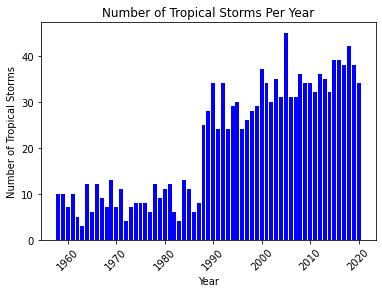

In [5]:
# Create x and y axis for bar chart
x_axis = weather["Year"].unique()
x_axis.sort()
y_axis = trop_storm_count

# Create bar plot to display number of tropical storms per year
plt.bar(x_axis, y_axis, color='b', align="center")
plt.title("Number of Tropical Storms Per Year")
plt.xlabel("Year")
plt.xticks(rotation= 45)
plt.ylabel("Number of Tropical Storms")
plt.show()

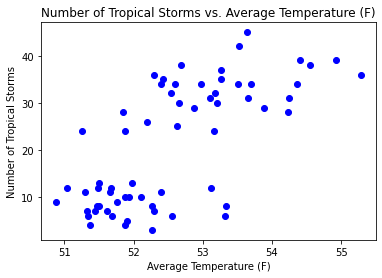

In [8]:
# Create x and y axis for scatter chart
x_axis = temp["Average_Temp"]
y_axis = trop_storm_count

# Create scatter chart to display number of tropical storms against average temp.
plt.scatter(x_axis, y_axis, color='b')
plt.title("Number of Tropical Storms vs. Average Temperature (F)")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Tropical Storms")
plt.show()

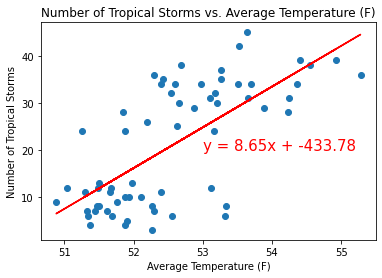

The r^2 value is 0.4885981875958564


In [7]:
# Plot the regression line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (53,20), fontsize=15, color="red")

plt.title("Number of Tropical Storms vs. Average Temperature (F)")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Tropical Storms")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [10]:
# Using the regression line and predicted temperature for 2022 (53.71), predict the number of hurricanes in 2022
hurricanes_2022 = (8.65 * 53.71) - 433.78
print(f'The predicted number of hurricanes that will occur in 2022 are {hurricanes_2022}')

The predicted number of hurricanes that will occur in 2022 are 30.81150000000008
